In [1]:
# Cell 1: Imports and setup
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping



In [3]:
# Load data
data_X = np.load('../data/processed/data_X.npy')
data_y = np.load('../data/processed/data_y.npy')
with open('../data/processed/tokenizer.pkl', 'rb') as f:
    import pickle
    tokenizer = pickle.load(f)

vocab_size = len(tokenizer.word_index) + 1
seq_length = data_X.shape[1]
print(f"Vocab size: {vocab_size}, Sequence length: {seq_length}")

Vocab size: 25759, Sequence length: 20


In [4]:
# Build Model
def build_model(vocab_size, seq_length,
                embed_dim=100,
                lstm_units=[128],
                dropout_rate=0.2):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size,
                        output_dim=embed_dim,
                        input_length=seq_length))
    for i, units in enumerate(lstm_units):
        # return_sequences=True for all but last
        model.add(LSTM(units, return_sequences=(i < len(lstm_units)-1)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(vocab_size, activation='softmax'))
    return model

model = build_model(vocab_size, seq_length, embed_dim=100, lstm_units=[128,128])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Callbacks
checkpoint = ModelCheckpoint('../models/best_model.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [7]:
# Cell 4: Train
history = model.fit(
    data_X, data_y,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    callbacks=[checkpoint, earlystop]
)

Epoch 1/10
5763/5763 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - accuracy: 0.0778 - loss: 6.3337
Epoch 1: val_loss improved from inf to 6.28151, saving model to ../models/best_model.h5


5763/5763 ━━━━━━━━━━━━━━━━━━━━ 1085s 188ms/step - accuracy: 0.0778 - loss: 6.3336 - val_accuracy: 0.0895 - val_loss: 6.2815
Epoch 2/10
5763/5763 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.0928 - loss: 6.0602
Epoch 2: val_loss improved from 6.28151 to 6.20605, saving model to ../models/best_model.h5


5763/5763 ━━━━━━━━━━━━━━━━━━━━ 1127s 196ms/step - accuracy: 0.0928 - loss: 6.0602 - val_accuracy: 0.0975 - val_loss: 6.2061
Epoch 3/10
5763/5763 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.1001 - loss: 5.8914
Epoch 3: val_loss improved from 6.20605 to 6.17094, saving model to ../models/best_model.h5


5763/5763 ━━━━━━━━━━━━━━━━━━━━ 1182s 205ms/step - accuracy: 0.1001 - loss: 5.8914 - val_accuracy: 0.1013 - val_loss: 6.1709
Epoch 4/10
5763/5763 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.1045 - loss: 5.7671
Epoch 4: val_loss improved from 6.17094 to 6.14726, saving model to ../models/best_model.h5


5763/5763 ━━━━━━━━━━━━━━━━━━━━ 1162s 202ms/step - accuracy: 0.1045 - loss: 5.7671 - val_accuracy: 0.1043 - val_loss: 6.1473
Epoch 5/10
5763/5763 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.1091 - loss: 5.6740
Epoch 5: val_loss improved from 6.14726 to 6.14509, saving model to ../models/best_model.h5


5763/5763 ━━━━━━━━━━━━━━━━━━━━ 1252s 217ms/step - accuracy: 0.1091 - loss: 5.6740 - val_accuracy: 0.1055 - val_loss: 6.1451
Epoch 6/10
5763/5763 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.1119 - loss: 5.5982
Epoch 6: val_loss did not improve from 6.14509
5763/5763 ━━━━━━━━━━━━━━━━━━━━ 1146s 199ms/step - accuracy: 0.1119 - loss: 5.5982 - val_accuracy: 0.1059 - val_loss: 6.1520
Epoch 7/10
5763/5763 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.1140 - loss: 5.5325
Epoch 7: val_loss did not improve from 6.14509
5763/5763 ━━━━━━━━━━━━━━━━━━━━ 1061s 184ms/step - accuracy: 0.1140 - loss: 5.5325 - val_accuracy: 0.1071 - val_loss: 6.1539
Epoch 8/10
5763/5763 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.1166 - loss: 5.4717
Epoch 8: val_loss did not improve from 6.14509
5763/5763 ━━━━━━━━━━━━━━━━━━━━ 1071s 186ms/step - accuracy: 0.1166 - loss: 5.4717 - val_accuracy: 0.1086 - val_loss: 6.1626
Epoch 9/10
5763/5763 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.1198 - loss: 5.4099
Epo

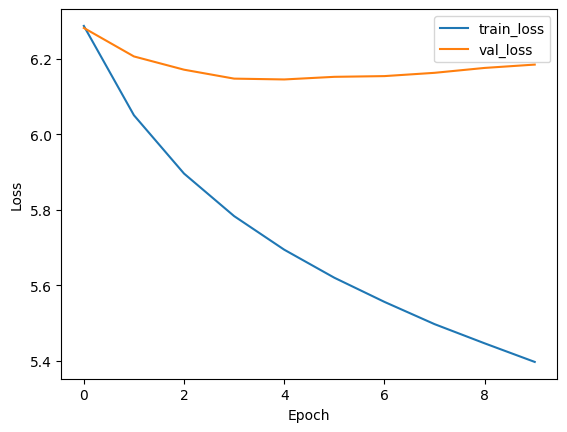

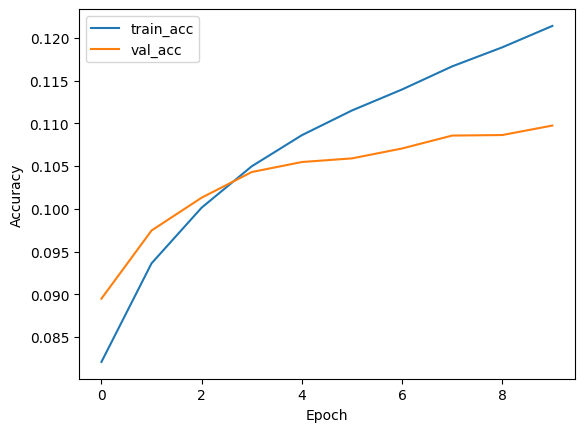

In [8]:
# Plot Training Curves
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [9]:
# Load Best Model and Evaluate
best = load_model('../models/best_model.h5')
loss, acc = best.evaluate(data_X, data_y, verbose=0)
print(f"Best model loss: {loss:.4f}, accuracy: {acc:.4f}")

Best model loss: 5.5402, accuracy: 0.1175
